In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

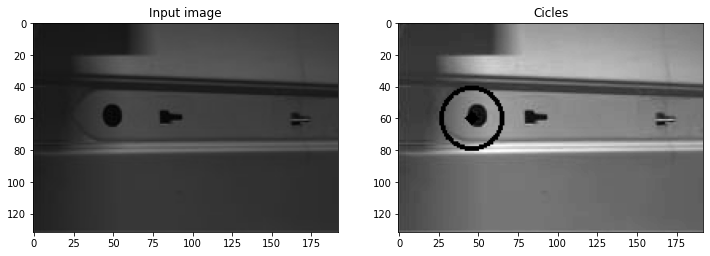

In [ ]:
img = cv2.imread("example4_1.png")

def found_cicles(cimg):
    circles = cv2.HoughCircles(cimg, cv2.HOUGH_GRADIENT, 1, minDist=10,
                               param1=50, param2=30,
                               minRadius=0, maxRadius=0)
    
    if circles is not None:
        circles = np.uint16(np.around(circles))

        for i in circles[0,:]:
            # draw the outer circle
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0), 2)
            # draw the center of the circle
            cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
    return cimg


def found_cicles_and_show(img):
    cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = found_cicles(cimg)
    plt.imshow(img, interpolation='nearest')
    plt.show()

cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cimg = found_cicles(cimg)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(img, cmap = 'gray')
axes[0].set_title('Input image')

axes[1].imshow(cimg.real, cmap = 'gray')
axes[1].set_title('Cicles')

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

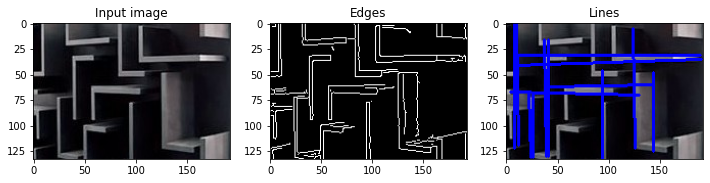

In [ ]:
img = cv2.imread('example4_2.png')

fig, axes = plt.subplots(1, 3)

axes[0].imshow(img, cmap = 'gray')
axes[0].set_title('Input image')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength=5,maxLineGap=50)

for i in lines:
    for x1,y1,x2,y2 in i:
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
        cv2.imwrite('answer.png',img)

ans_img = cv2.imread("answer.png")

axes[1].imshow(edges.real, cmap = 'gray')
axes[1].set_title('Edges')

axes[2].imshow(ans_img.real, cmap = 'gray')
axes[2].set_title('Lines')

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()